# Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('Ecommerce Customers')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

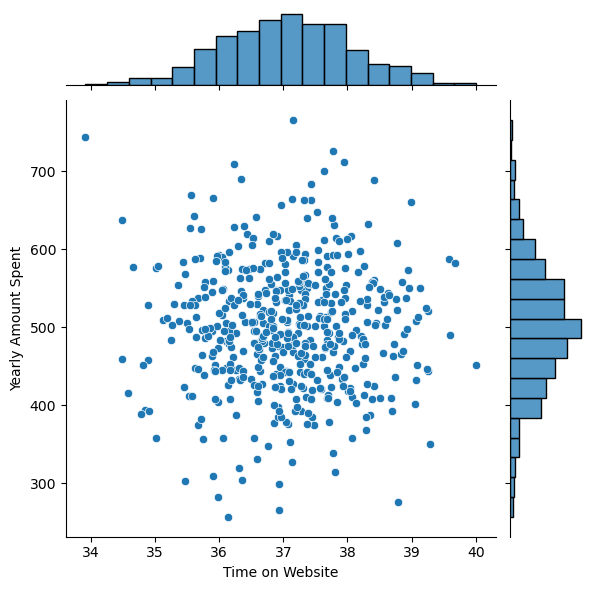

In [8]:
sns.jointplot(data=df,x='Time on Website', y='Yearly Amount Spent')

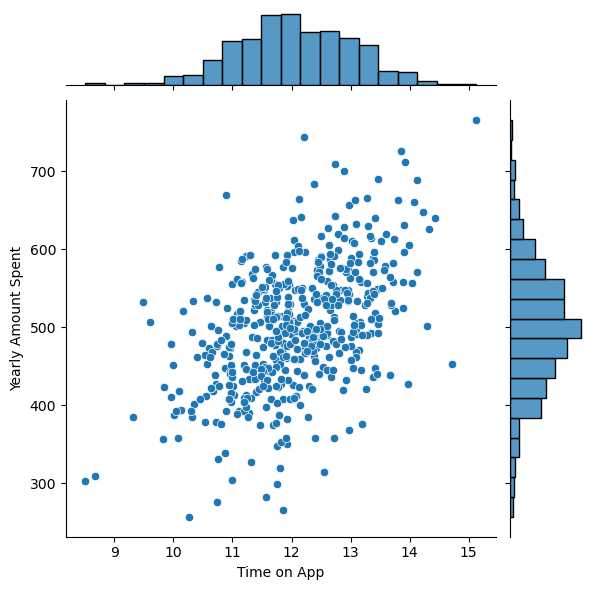

In [9]:
sns.jointplot(data=df,x='Time on App', y='Yearly Amount Spent')

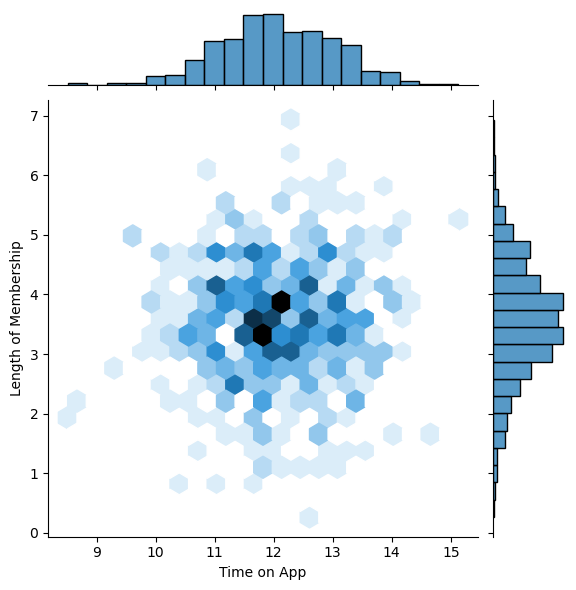

In [11]:
sns.jointplot(data=df,x='Time on App', y='Length of Membership', kind="hex")

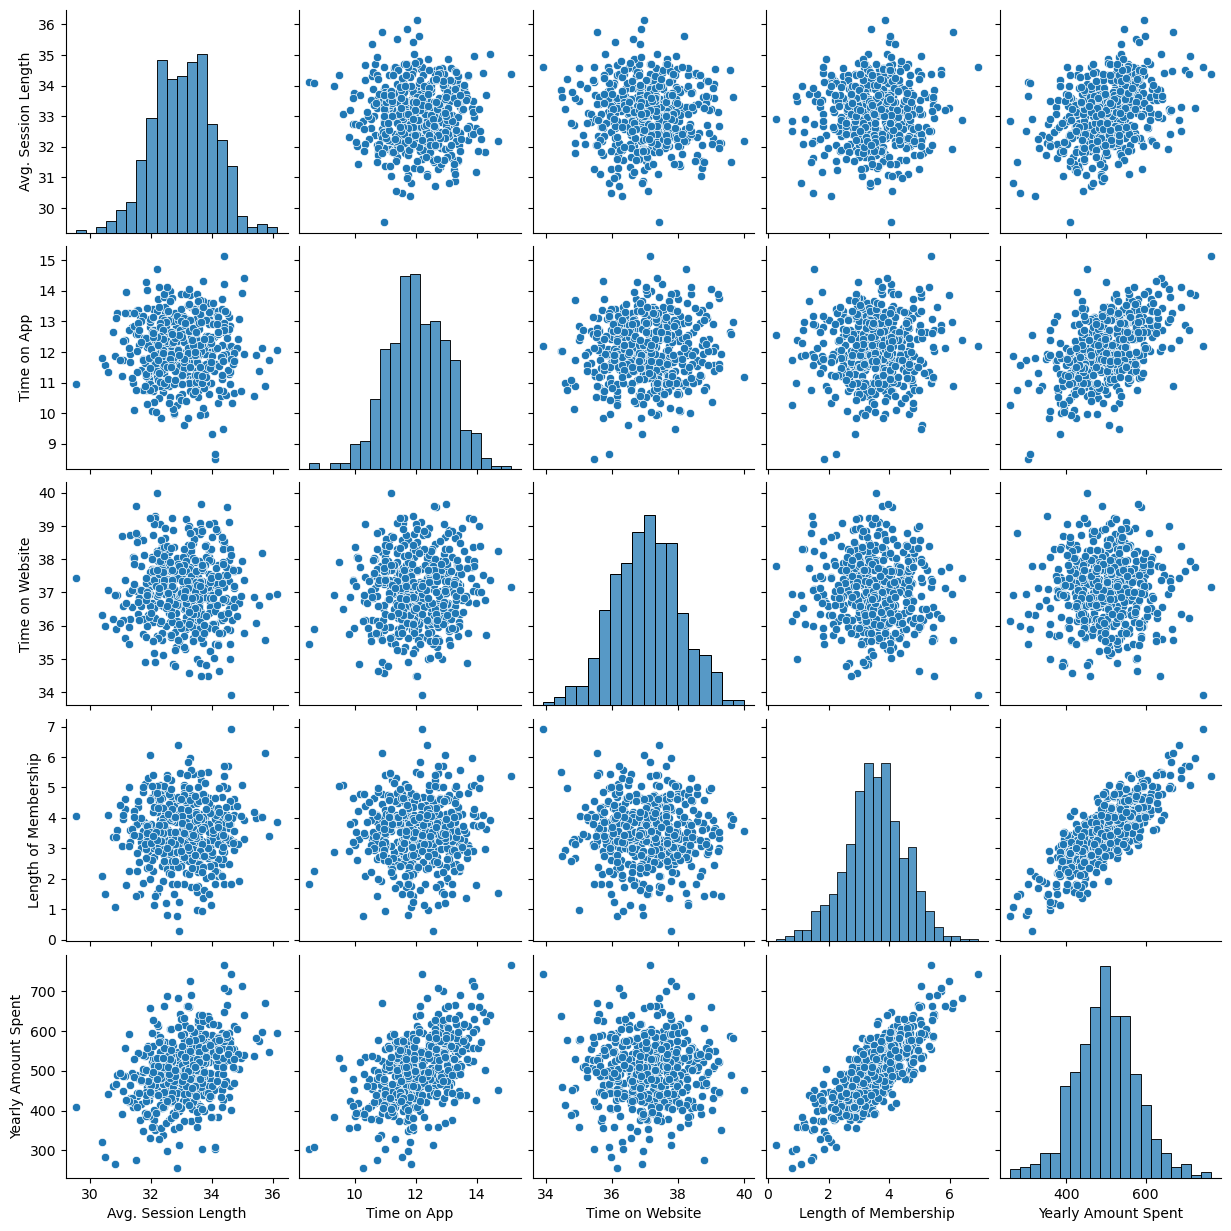

In [12]:
sns.pairplot(df)

What is most coorelated with yearly amount spent is length of membership

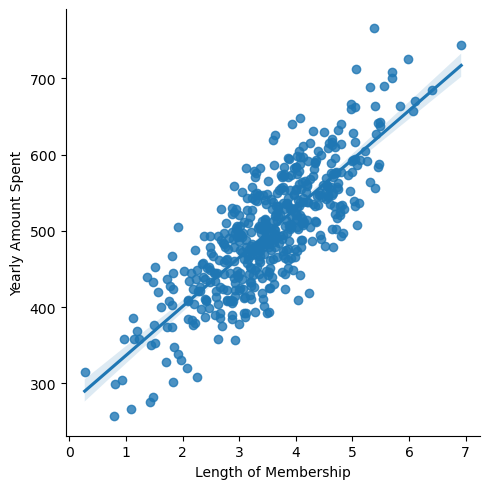

In [13]:
sns.lmplot(data=df,x='Length of Membership', y='Yearly Amount Spent')

### Training and Testing Data

In [14]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [15]:
y=df['Yearly Amount Spent']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=101)

### Train the model

In [18]:
from sklearn.linear_model import LinearRegression

create instance of linear regression model

In [19]:
lm = LinearRegression()

In [34]:
print(lm)

LinearRegression()


Train / fit on training data

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

Print out coefficients of model
They are for each column

In [21]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Now that we have our model, lets evaluate the performance by predicting off the test values

use lm.predict() to predict off X_test set of data

In [22]:
predictions = lm.predict(X_test)

# set it to array called predictions

scatterplot of real test values versus predicted values

Text(0, 0.5, 'Predicited Values')

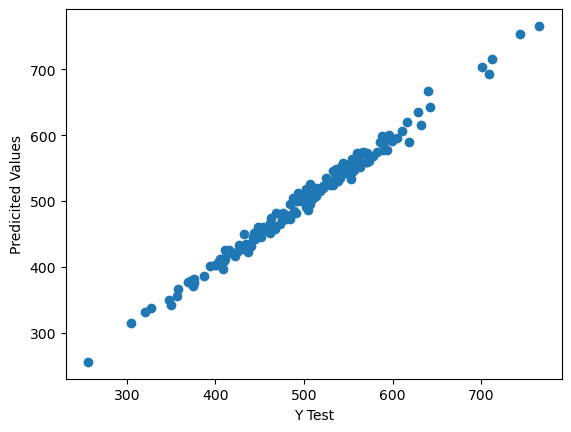

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicited Values')

the above is doing very well

### Evaluate the model

Lets evaluate the model performance by calculating the residual sum of squares and the explained variance score R^2

Calculate the mean absolute error, mean squarred error, and root mean squarred error

In [24]:
from sklearn import metrics

In [27]:
print('MAE ', metrics.mean_absolute_error(y_test,predictions))

MAE  7.228148653430845


In [28]:
print('MSE', metrics.mean_squared_error(y_test,predictions))

MSE 79.81305165097454


In [29]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE 8.933815066978639


In [30]:
metrics.explained_variance_score(y_test,predictions)
# explains about 99% of the variance

0.9890771231889607

### Residuals

C:\Users\D8ISU4A\AppData\Local\Temp\1\ipykernel_16408\1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

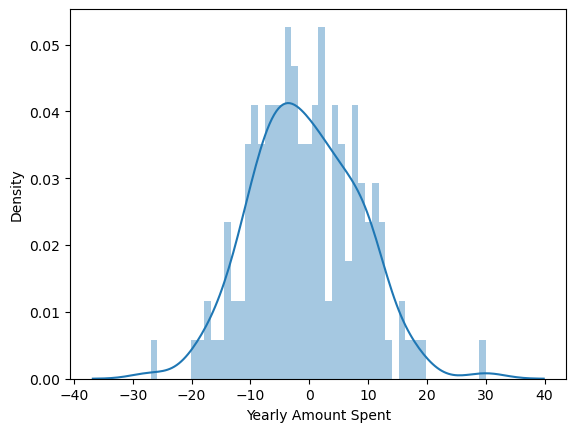

In [31]:
sns.distplot((y_test-predictions),bins=50)

we have a good distribution above, shouldn't be concerned about residuals

### Conclusion
Focus more on mobile app or membership development.
Or maybe membership development

In [32]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])

In [33]:
cdf

,Coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### How do we interpret these results?

A one unit increase in avg session length, holding all other units fixed. a 1 unit increase in avg session length will result in a $ 25.98  spent, 1 unit increase in time on app is $38. time on website is .19 cents, and the best is length of membership, 1 unit results in 61 dollars increase.

Can either say work on app more becuase its working better or can say work on website more because it is lagging behind and has more opportunity

# Logistic regression

In [35]:
df2 = pd.read_csv('advertising.csv')

In [36]:
df2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [38]:
df2.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [39]:
df2.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<Axes: ylabel='Frequency'>

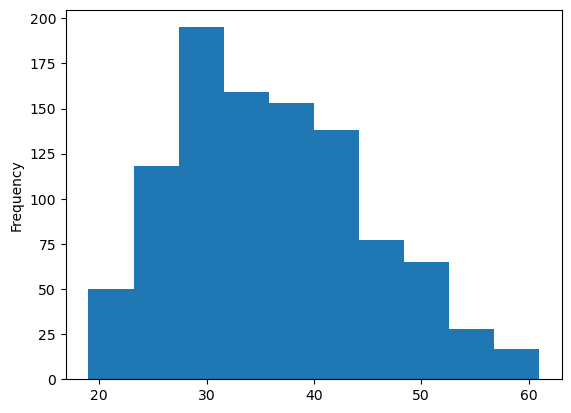

In [41]:
df2['Age'].plot.hist()

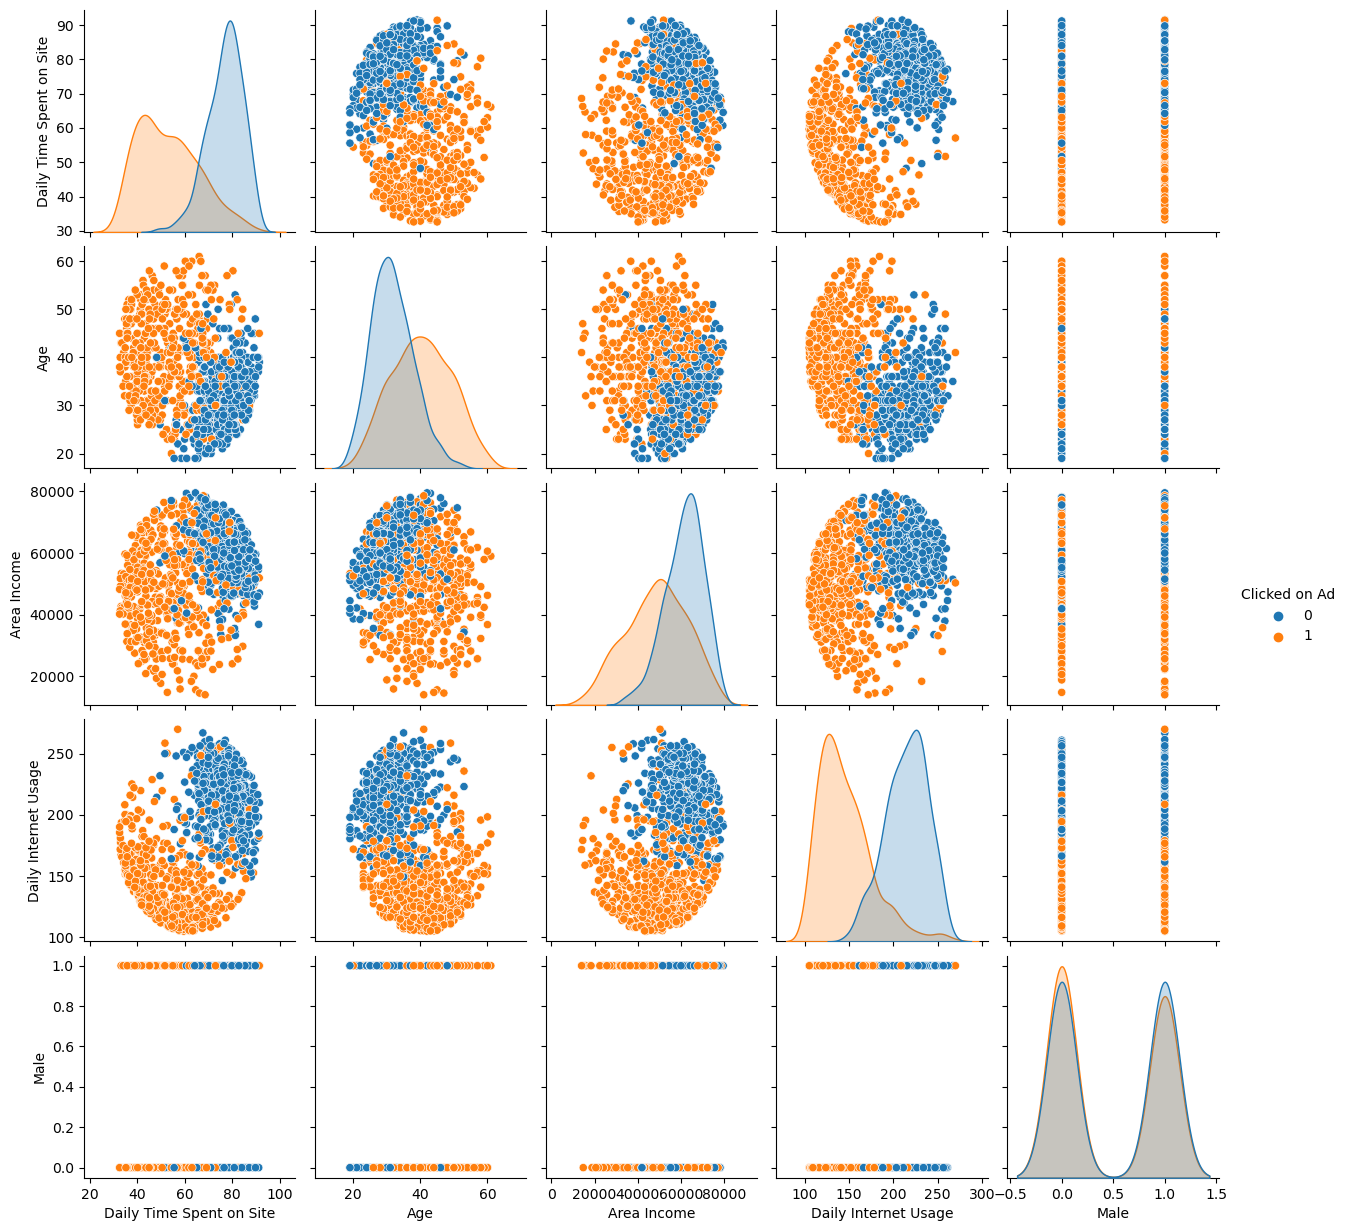

In [45]:
sns.pairplot(df2, hue='Clicked on Ad')

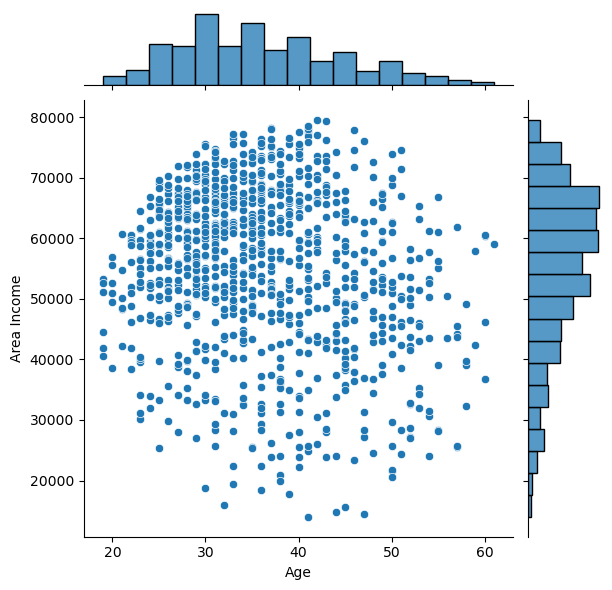

In [43]:
sns.jointplot(x='Age',y="Area Income",data=df2)

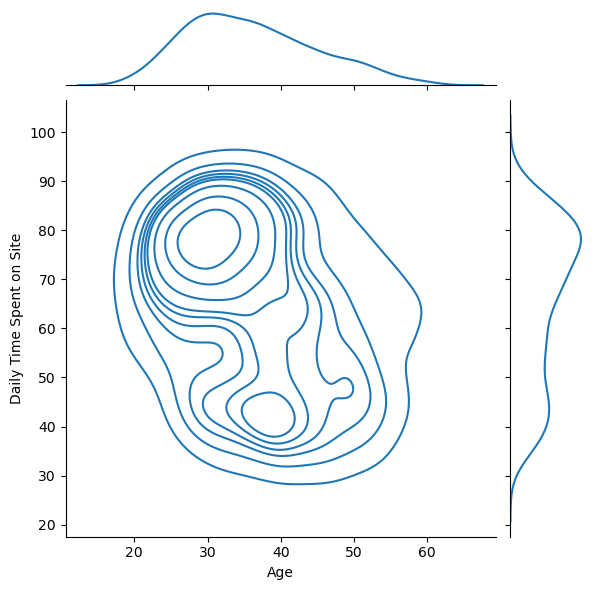

In [44]:
sns.jointplot(x='Age',y="Daily Time Spent on Site",data=df2, kind ='kde')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df2[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]

y = df2['Clicked on Ad']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lg = LogisticRegression()

In [51]:
lg.fit(X_train,y_train)

LogisticRegression()

In [52]:
predictions2 = lg.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[149   8]
 [ 14 129]]
